#Problem Statement
To create a classifier for predicting right class of Iris species.

Data Link: https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

#Downloading the Data

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [2]:
#Imports

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree, export_text



In [3]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


###Training, Validation and Test Sets

In [7]:
train_df, test_df = train_test_split(df, test_size = 0.3, random_state = 0)

In [8]:
print(train_df.shape)
print(test_df.shape)


(105, 6)
(45, 6)


###Identifying Input and Target Columns

In [9]:
inputs_cols = list(df.columns)[1:5]
target_col = 'Species'

In [10]:
inputs_cols

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [11]:
target_col

'Species'

In [12]:
train_inputs = train_df[inputs_cols].copy()
train_targets = train_df[target_col].copy()

In [13]:
test_inputs = test_df[inputs_cols].copy()
test_targets = test_df[target_col].copy()

## Training and Visualizing Decision Trees


###Training

In [14]:
model = DecisionTreeClassifier( max_depth = 4, random_state = 0)
                               

In [15]:
%%time
model.fit(train_inputs, train_targets)

CPU times: user 1.89 ms, sys: 1.13 ms, total: 3.02 ms
Wall time: 2.6 ms


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

###Evaluation

In [16]:
train_preds = model.predict(train_inputs)
train_preds

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-vir

In [ ]:
pd.value_counts(train_preds)

Iris-virginica     40
Iris-versicolor    34
Iris-setosa        31
dtype: int64

In [20]:
train_probs = model.predict_proba(train_inputs)
train_probs[1:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [21]:
accuracy_score(train_targets, train_preds)

1.0

In [22]:
model.score(test_inputs, test_targets)

0.9777777777777777

### Visualization



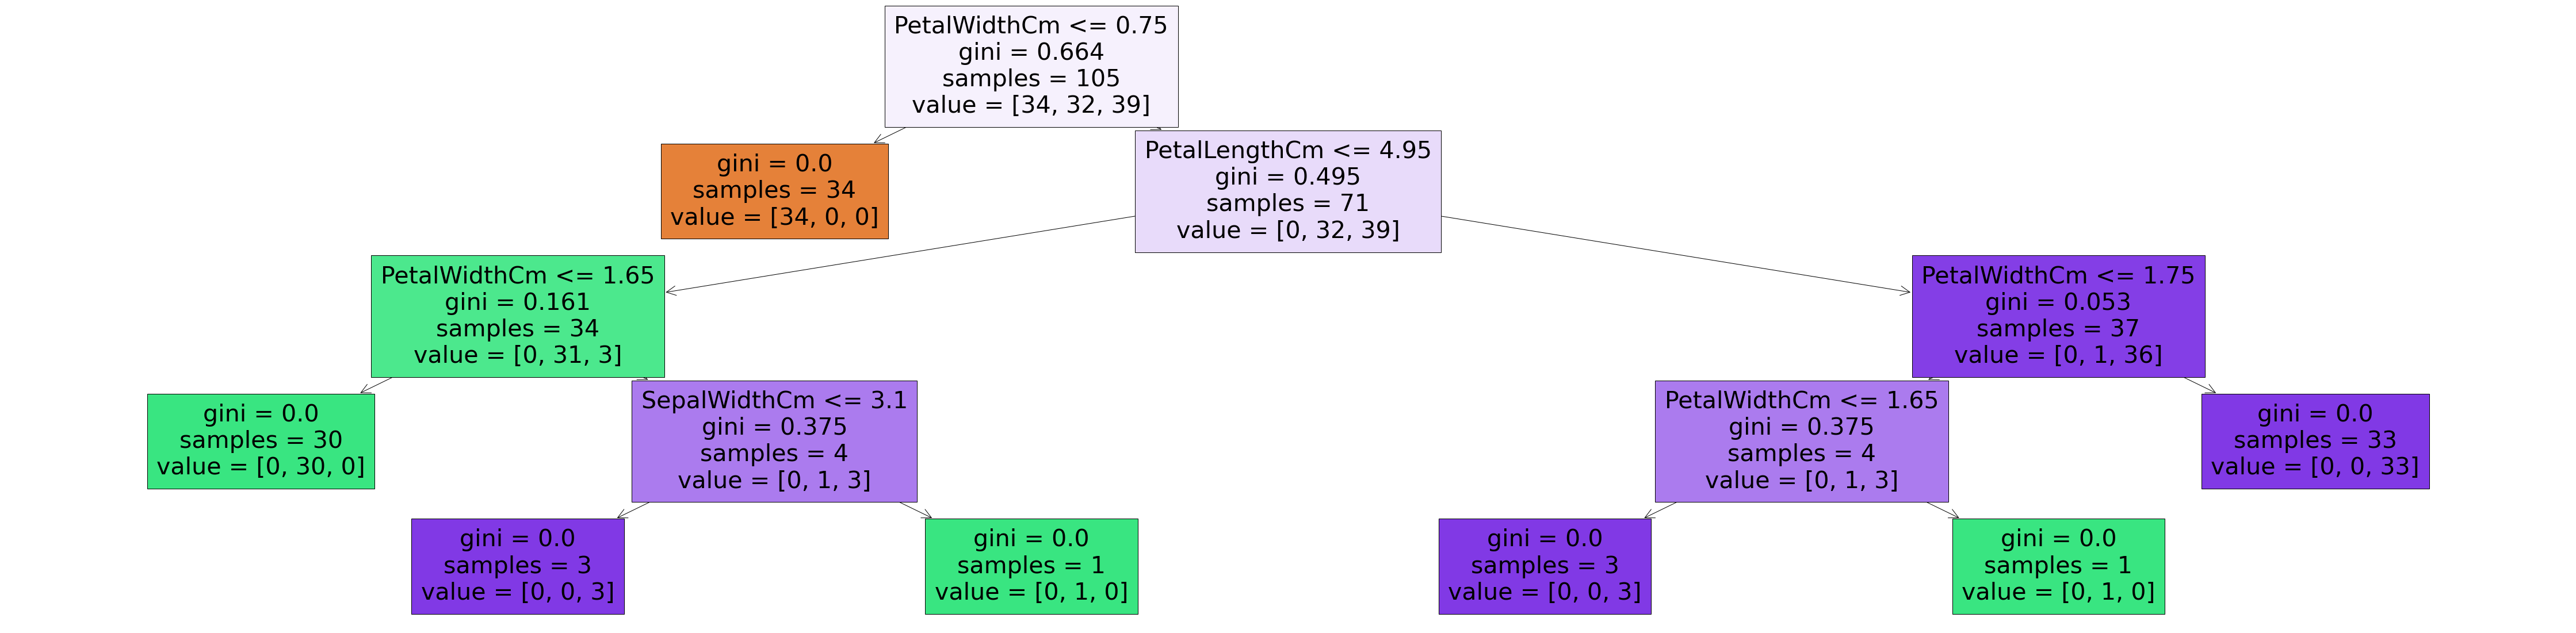

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize = (80, 20))
plot_tree(model, feature_names = train_inputs.columns, max_depth = 4, filled = True);

In [24]:
model.tree_.max_depth

4

In [25]:
tree_text = export_text(model, max_depth = 4, feature_names = list(train_inputs.columns))
print(tree_text[:5000])

|--- PetalWidthCm <= 0.75
|   |--- class: Iris-setosa
|--- PetalWidthCm >  0.75
|   |--- PetalLengthCm <= 4.95
|   |   |--- PetalWidthCm <= 1.65
|   |   |   |--- class: Iris-versicolor
|   |   |--- PetalWidthCm >  1.65
|   |   |   |--- SepalWidthCm <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- SepalWidthCm >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |--- PetalLengthCm >  4.95
|   |   |--- PetalWidthCm <= 1.75
|   |   |   |--- PetalWidthCm <= 1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- PetalWidthCm >  1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- PetalWidthCm >  1.75
|   |   |   |--- class: Iris-virginica



### Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [26]:
model.feature_importances_

array([0.        , 0.02150464, 0.39766951, 0.58082584])

In [27]:
importance_df = pd.DataFrame({
    'feature' : train_inputs.columns,
    'importance' : model.feature_importances_
}).sort_values('importance', ascending = False)

In [28]:
importance_df

,feature,importance
3,PetalWidthCm,0.580826
2,PetalLengthCm,0.397670
1,SepalWidthCm,0.021505
0,SepalLengthCm,0.000000


## Making Predictions on New Inputs

Let's define a helper function to make predictions on new inputs.

In [29]:
def predict_input(model, single_input):
    X_input = pd.DataFrame([single_input])
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [30]:
#putting relevant random values
new_input = {'SepalLengthCm' : 4.3,
             'SepalWidthCm' : 3.6,
             'PetalLengthCm': 1.3,
             'PetalWidthCm' : 0.2}

In [31]:
predict_input(model, new_input)

('Iris-setosa', 1.0)